
# An introduction to Gradient Descent


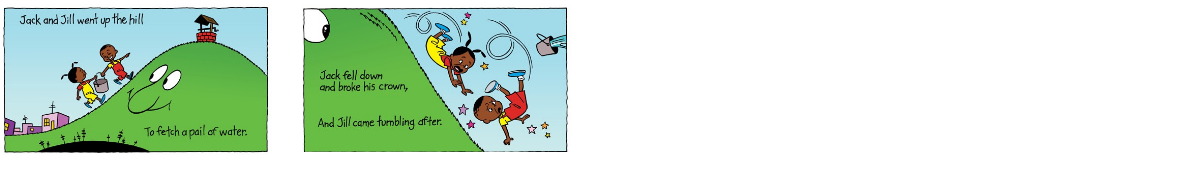


The gradient descent algorithm is widely used across several machine learning techniques. It forms the backbone of neural networks and backpropagation.                                                                                                           
In this post, let's try to understand how gradient descent works, and also get a mathematical intution behind this ubiquitous technique!

### What is a gradient ?

The gradient of a function at a specified point is much like its slope; only, it's a _vector_ (unlike the slope, which is a scalar).                                
It points in the direction of **greatest ascent** of the function, in other words, the direction in which the function would increase _the most_. 



### How is it defined ?

The components of the gradient vector are the _partial derivatives_ of the function in each dimension of concern.              
Let us look at an example to understand this clearly. Consider the following function:

$\normalsize f(x,y) = 2x^2 - sin(y)$

$\normalsize f $ is a function of two variables: x and y. Therefore, it has two partial derivatives, one with respect to each variable. 

$\large \frac{\partial f}{\partial x} = \normalsize 4x$

$\large \frac{\partial f}{\partial y} = \normalsize - \: cos(y)$ 


Remember, these are just the individual components of the vector. The gradient is obtained by combining them in their respective directions.


$\normalsize \nabla f = \large\left(\frac{\partial f}{\partial x}\right) \small \hat i + \large \left(\frac{\partial f}{\partial y}\right) \small \hat j \: \normalsize = \: {4x} \small \: \hat i - \normalsize cos(y) \small \: \hat j$  

It can be seen from here why the concept of a gradient makes sense only when the function is of two or more variables.
When $f$ depends on only one variable (say $x$), the gradient is just the slope, $df/dx$.  There is no need for partial derivatives.

### When is gradient descent used ?

It is common in machine learning problems to encounter a _cost function_, which has to be minimized with respect to certain input parameters. Gradient descent is often used to minimize these cost functions.                                                                                                                         
To understand what a cost function could look like, let us look at the following figure and ask the question: What is the "best line" that can be drawn to fit the data?                                                                                                 
In other words, **what is the line that best fits the data**?

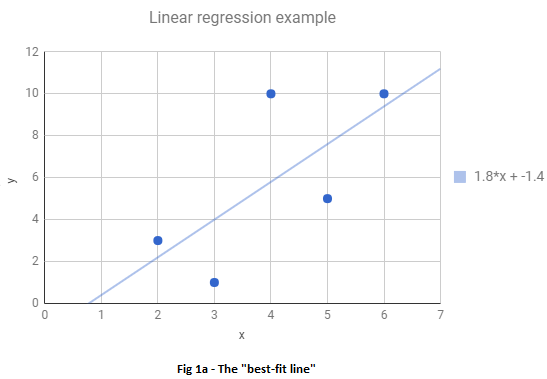

The question is answered by performing a [linear regression](https://en.wikipedia.org/wiki/Linear_regression).                             
The above figure was generated using Google sheets, which was able to determine that the line that would _best_ fit the data is $y = 1.8x - 1.4$ 

**Question:** How was this particular line determined as the best-fit line? What does fitting the data "best" mean anyway?

## Cost function

One way to qualitatively define a _best-fit_ line could be to say that "_The line that is **closest** to all the points **equally** is the best-fit line_".

Quantitatively, this means that we're looking for a line such that the total distance between the points and the line is the _least_. 

That is, we want a line such that $\:\textrm{d1 + d2 + d3 + d4 +d5 = } \textrm{minimum}$

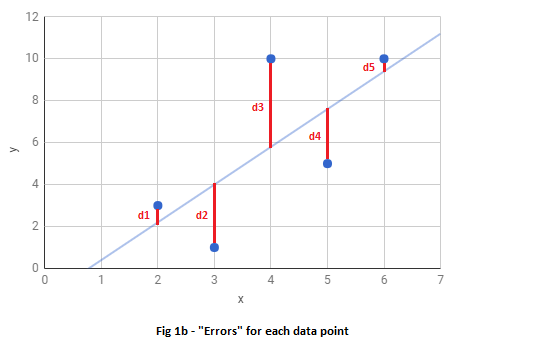

The formulation we just wrote down ( $\sum_1^n \textrm{d}$ ), is an example of what is called a _cost function_, often represeneted by the letter **J**.

What we want, is to find the line that **minimizes** the cost function, so that the sum of absolute values of distances, $\sum_1^n \textrm{d}$ , is minimum.                                                                                                                 

Each of these distances (d1 to d5) is the deviation of predicted line from the actual points, and can be thought of as **errors**, since the distances are an indication of how much the predicted line _missed_ the points.

Let us go ahead and calculate the errors in this particular example.                                                               

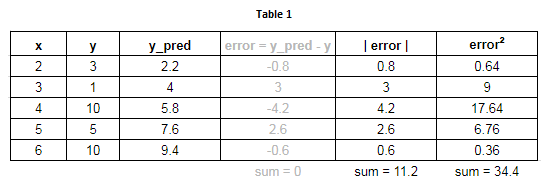

Columns 1 and 2 : The data points used.                                                                                        
Column 3 : The value of y predicted from regression, using $y = 1.8x - 1.4$, indicated by *y_pred*.  
Column 4 : The values of *errors*, or how much the line *missed* the target.                                                      
Column 5 : The measured distances as shown in Fig 1b, which are the *absolute values of errors*. 


Column 6 : The squares of errors - but hold on - why are we even computing the *squares of errors*?

Before we get into that, it should be easy to understand why we define the cost function to be the sum of *absolute values of errors* (distances in Fig 1b) rather than just the sum of *errors*.                                                                  
As can be seen in column 4, the error values can have a positive or negative sign depending on which side of the line a point falls. Summing these errors tends to cancel out differences in some manner, giving a much lower value of total error than anticipated. In this case, the errors add up to exactly zero! Though this just happened by fluke here, it clearly shows why summing the errors is a bad idea. A zero error means that the line is a perfect fit, and we can see that the fit in our case is far from perfect.   

This is why we define our cost function **J** as the sum of *absolute values of errors*, which is  from Fig 1b, is  $\sum_1^n \textrm{d}$.

Now back our question - why did we compute *squares of errors*?

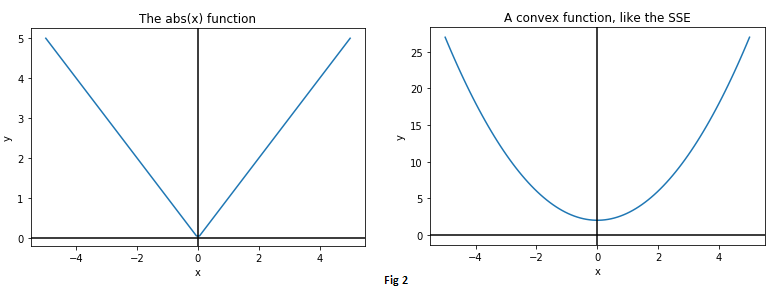

Remember that our goal is to minimize the cost function, which we be will doing using Calculus.                                           
It turns out that the absolute value function is [not very friendly](https://en.wikipedia.org/wiki/Absolute_value#Derivative) to Calculus, as it is not differentiable at zero.                                                                                        
Instead, to make things simpler, we could define our cost function **J** to be the **sum of *squared errors*** ([SSE](https://en.wikipedia.org/wiki/Least_squares)), as minimizing the square of an error is essentially the same as minimizing the error itself.                                                                                                                          

This definition of the cost function has the following advantages:
- The square of an error is always positive
- Larger errors are magnified more than smaller errors
- The cost function is now a smooth, [convex function](https://en.wikipedia.org/wiki/Convex_function), friendly to differentiation!


## Solving for the best-fit line

Now that we have defined our cost function as the sum of squared errors, let us proceed with writing down its mathematical form, and that of its derivatives.

$\large J = \sum_i^n (y_{pred} - y)^2$                                                                                                                                                                                                                                 

$\large \:\:\:\:  = \sum_i^n (mx + c - y)^2$

$x$ and $y$ are aready provided in the form of the input data and we have no control over them; what we _can_ control are the line's parameters, namely the slope $m$ and the intercept $c$.                                                                                                      
Stated in another way, we need to **find the values of $m$ and $c$ that make the value of $J$ minimum**, for the given input data. The slope and the intercept are the knobs we can play with, in order to minimize $J$.

Now that we have an expression for $J$, its partial derivatives with respect to $m$ and $c$, the control variables, are:

$\Large \frac{\partial J}{\partial m} = \large  2 * \sum_i^n (mx + c - y) * x$                                                                                                                                                                                                                      

$\Large \frac{\partial J}{\partial c} = \large  2 * \sum_i^n (mx + c - y) $

The gradient descent alogirthm consists of the following steps:
1. Randomly initialize $m$ and $c$
2. For both $m$ and $c$, take a small step in the direction opposite to their respective gradients 
3. Update values of m and c 
4. Repeat steps 2-3 until the minimum of the cost function is reached, giving the values of $m$ and $c$ for the best-fit line.

Let us look into these steps in more detail.

#### Step 1 - Random initizalition

Start with _some_ line. A common choice is $m=0$, $c=0$. This is the x-axis.                                                            
We always start by assuming that the x-axis is the best fit for our data.                                                                
At this state, the errors and cost may look like this:

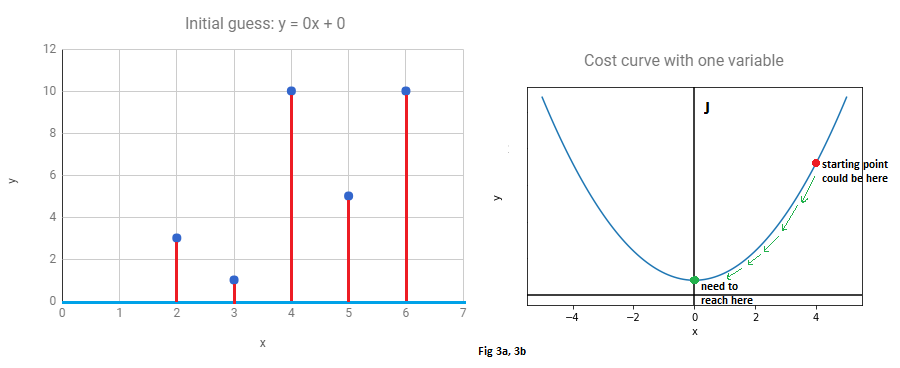

               
        
                     (Fig 3b is the cost function with only one variable and is only for illustration purposes only)

#### Steps 2 & 3 - Gradient descent

For both $m$ and $c$, take a tiny step in the direction opposite to that of their respective gradients, since we wish to minimize the cost function.                                                                                                                
What this means is that either decrease _or_ increase $m$ and $c$ at every step by a small amount, such that the cost function is continuously decreasing.                                                                                                             
For example, if a small increase in $m$ would increase the cost, then proceed in the opposite direction and decrease $m$.

![alt text](gd_22.gif "gradient descent in action")

It can be seen in the above animation that the line initially starts from the x-axis, and then **continuously adjusts its slope and intercept values** to get to the best-fit position, which is the position of _minimum cost_. The animation has to be run for a few more iterations to get to the lowest cost, but it can be easily seen that the values of $m$ and $c$ are on their way to approach the regression result of 1.8 and -1.4 obtained from Google sheets/Excel regression. 

Mathematically, these steps can be represented as:

$\large m = m - \alpha \Large \frac{\partial J}{\partial m}$

$\large c \;\,  = c  - \alpha \Large \frac{\partial J}{\partial c}$

where $\alpha$ is just a scalar called the **learning rate**, that is added to control the _magnitude_ of the step taken during each iteration.

### Working through another example

For the sake of illustration, let us consider a case where all points actually lie on a straight line. Without using the line's information, we will use gradient descent to get to it, starting from $m =0$ and $c = 0$

The points below are all plotted using the line $y = 2x + 5$.                                                                           
The following animation (Fig 4a) shows gradient descent in action as it continuously adjusts the slope and intercept values until it perfectly fits the points.

Fig 4a,b | 
- | - 
![alt](gd_2xp5.gif) | ![alt](learning_rates.png)

Fig 4b shows the cost function decreasing with the number of iterations (updates), as we get closer and closer to the real line.   
The effect of choosing different values of the learning rate, $\alpha$ is also shown. 
A low value such as **0.001** takes much longer to converge than a high value such as **0.03**. This value should be carefully chosen; if $\alpha$ is too high, the cost may begin to diverge.
For the animation above, $\alpha = 0.03$ was chosen.


Let us also take a look at the plot of the cost function. This will be a 2D plot, since there are two variables in the cost function, $m$ and $c$.

![alt](cost_graphs2.png)

Fig 5a shows a sweep of a range of values of each $m$ and $c$.                                                                         

Since the points lie on a line _for sure_ in this example, it can be said with certainty that the minimum cost is _zero_.        
In other words, there certainly exists an $m$ and a $c$, such that there is a perfect fit line.
Sure enough, this can be verified if costs are computed for the range of values of $m$ and $c$ and are sorted in increasing order, as shown in Fig 5b. The minimum cost is indeed zero, and of course, this happens when $m=2$ and $c=5$.

## Summary

Gradient descent is a simple yet powerful and commonly used algorithm for optimizing cost functions in several machine learning techniques. The algorithm was introduced in this post through linear regression, but the idea remains the same for other techniques such as logistic regression or neural networks. Understanding gradient descent is key to the having a strong foundation in machine learning and deep learning!

## References

Images and animations used in this post were generated using Python 2.7.
The Jack and Jill picture was taken from [here](http://comicsalliance.com/files/2011/10/rhyme03.jpg).